# **Time Series Analysis with Arima Model**

IMPORT LIBRARY




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

LOAD DATASET

In [ ]:
data = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

CONVERT TO MONTH TODATETIME

In [ ]:
data['Month'] = pd.date_range(start='2000-01-01', periods=len(data),freq='M')
data.set_index('Month',inplace=True)

PLOT THE TIME SERIES

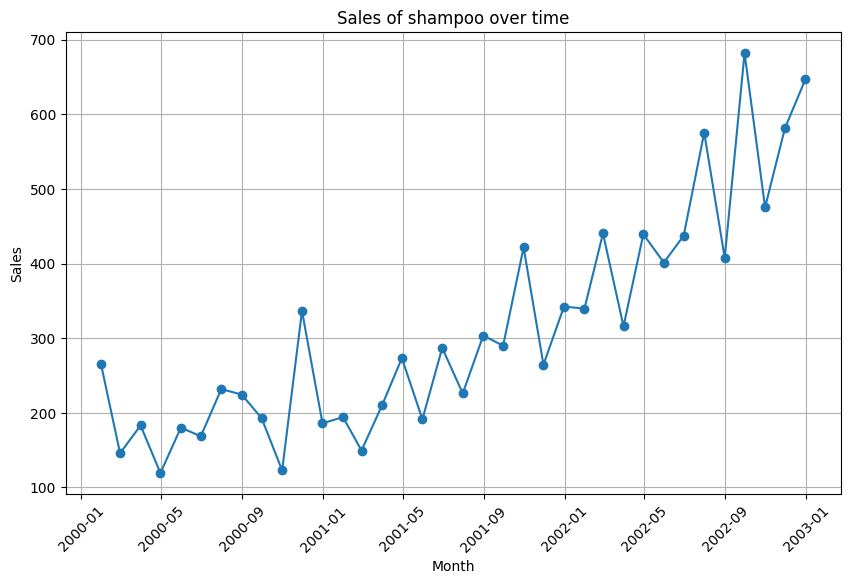

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'] ,marker='o',linestyle= '-' )
plt.title('Sales of shampoo over time')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

DECOMPOSITION

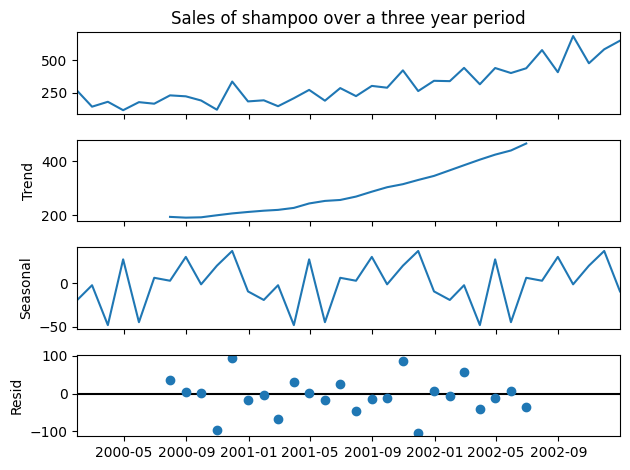

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model = 'attractive')
fig = decomposition.plot()
plt.show()

FORCASTING ARIMA MODEL

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['Sales of shampoo over a three year period'])

print ('ADF Statistic: ', adf_test[0])
print ('p-value: ', adf_test[1])

ADF Statistic:  3.060142083641181
p-value:  1.0


FIT AN ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (data['Sales of shampoo over a three year period'],order=(1,1,1))
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               01:04:42   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

FORCASTING FUTURE VALUES

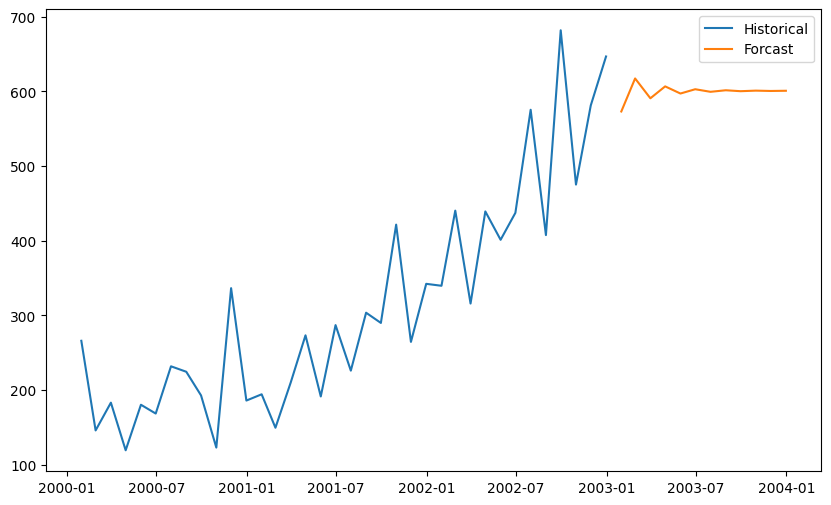

In [ ]:
forecast = result.forecast(steps=12)

plt.figure(figsize=(10,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'], label='Historical')
plt.plot(forecast.index, forecast, label='Forcast')
plt.legend()
plt.show()